In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
import numpy as np
import matplotlib.pyplot as plt
import random

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [3]:
IMG_HEIGHT = 656
IMG_WIDTH = 1152
model = Sequential([
    Conv2D(16, 3, (2,2), padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    Conv2D(16, 3, (1, 1), padding='same', activation='relu'),
    Conv2D(32, 3, (2,2), padding='same', activation='relu'),
    Conv2D(32, 3, (1,1), padding='same', activation='relu'),
    Conv2D(64, 3, (2,2), padding='same', activation='relu'),
    Conv2D(64, 3, (1,1), padding='same', activation='relu'),
    Conv2D(96, 3, (2,2), padding='same', activation='relu'),
    Conv2D(96, 3, (2,2), padding='same', activation='relu'),
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


conv2d (3, 3, 3, 16)
16


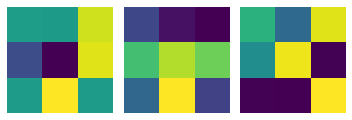

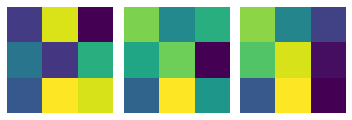

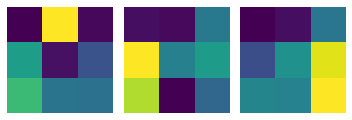

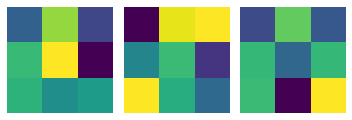

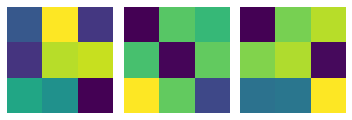

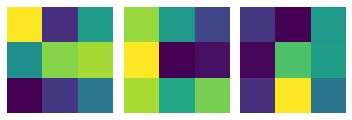

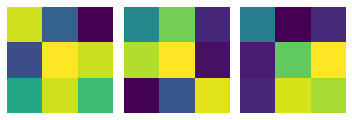

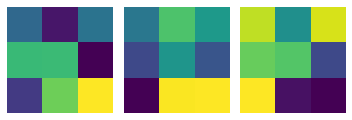

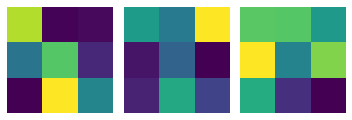

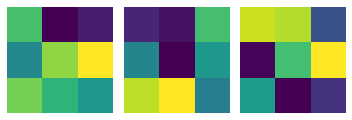

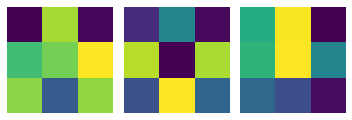

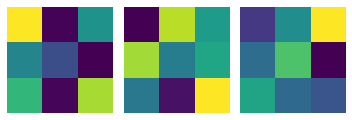

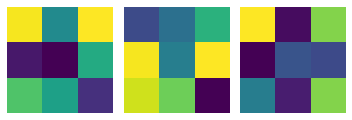

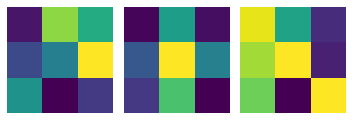

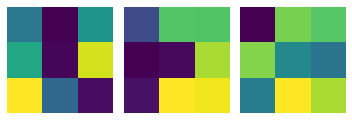

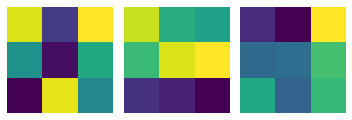

conv2d_1 (3, 3, 16, 16)
16


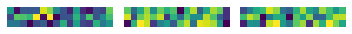

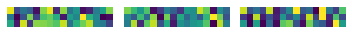

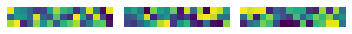

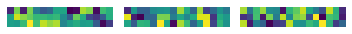

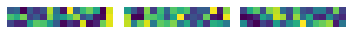

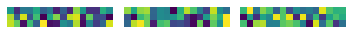

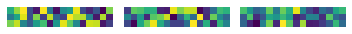

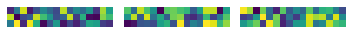

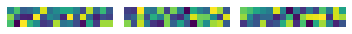

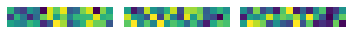

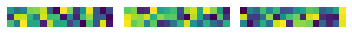

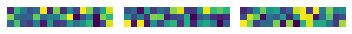

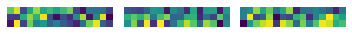

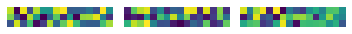

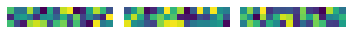

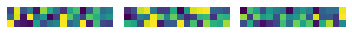

conv2d_2 (3, 3, 16, 32)
32


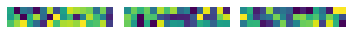

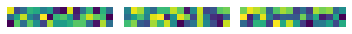

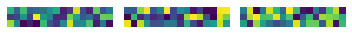

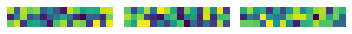

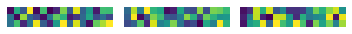

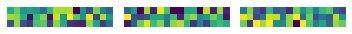

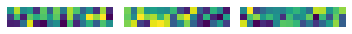

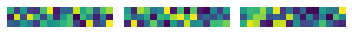

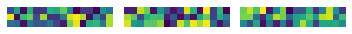

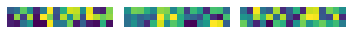

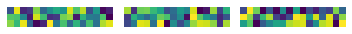

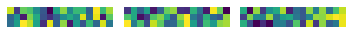

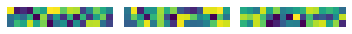

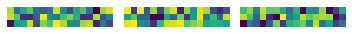

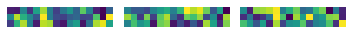

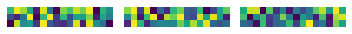

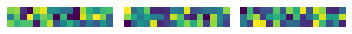

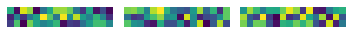

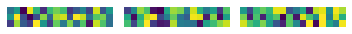

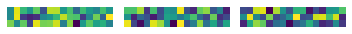

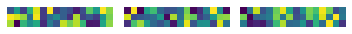

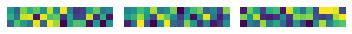

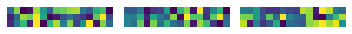

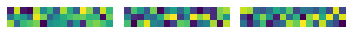

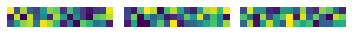

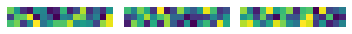

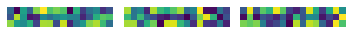

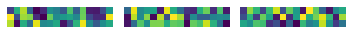

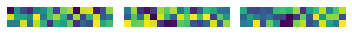

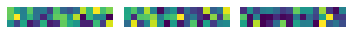

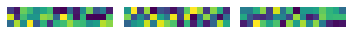

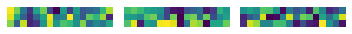

conv2d_3 (3, 3, 32, 32)
32


conv2d_4 (3, 3, 32, 64)
64


conv2d_5 (3, 3, 64, 64)
64


conv2d_6 (3, 3, 64, 96)
96


conv2d_7 (3, 3, 96, 96)
96


In [4]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)